# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities

['harbour breton',
 'punta arenas',
 'hobart',
 'bandarbeyla',
 'rikitea',
 'ardakan',
 'chuy',
 'mataura',
 'ushuaia',
 'ixtapa',
 'upernavik',
 'tasiilaq',
 'ponta do sol',
 'cape town',
 'dikson',
 'necochea',
 'taolanaro',
 'amderma',
 'hilo',
 'sambava',
 'port alfred',
 'port elizabeth',
 'tiksi',
 'nikolskoye',
 'micheweni',
 'tarakeswar',
 'luderitz',
 'puerto ayora',
 'megion',
 'ugoofaaru',
 'hithadhoo',
 'albany',
 'itaituba',
 'mar del plata',
 'vaini',
 'new norfolk',
 'yellowknife',
 'khatanga',
 'puerto quijarro',
 'hrubieszow',
 'qasigiannguit',
 'guerrero negro',
 'skiros',
 'yueyang',
 'belushya guba',
 'carnarvon',
 'bredasdorp',
 'chokurdakh',
 'bilibino',
 'isangel',
 'thompson',
 'mahibadhoo',
 'nizhneyansk',
 'chapais',
 'paamiut',
 'clyde river',
 'bonthe',
 'hervey bay',
 'tungkang',
 'belaya gora',
 'bambanglipuro',
 'salalah',
 'bat khela',
 'aklavik',
 'kruisfontein',
 'angoche',
 'kaitangata',
 'jamestown',
 'peruibe',
 'barrow',
 'cabo san lucas',
 'ternat

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import json
import requests
import gmaps
from pprint import pprint
import time

#Weather API Key
from api_keys import weather_api_key


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [5]:

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [6]:
#test pull for json() response
weather_response = requests.get(query_url + "new york")
weather_data = weather_response.json()
weather_data

{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 63.39,
  'feels_like': 61.27,
  'temp_min': 62.01,
  'temp_max': 64.4,
  'pressure': 1017,
  'humidity': 39},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 0},
 'clouds': {'all': 1},
 'dt': 1618354783,
 'sys': {'type': 1,
  'id': 5141,
  'country': 'US',
  'sunrise': 1618309184,
  'sunset': 1618356766},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [7]:
weather_data['main']['temp_max']

64.4

In [8]:
data = []

counter = 0

#to limit loop use this for city in cities[:50] = [:50] indicates the limiter number.
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_data = weather_response.json()
    counter = counter + 1
    
    try:
        max_temp = weather_data['main']['temp_max']
        speed = weather_data['wind']['speed']
        humidity = weather_data['main']['humidity']
        cloudiness = weather_data['clouds']['all']
        date = weather_data['dt']
        latitude = weather_data['coord']['lat']
        longitude = weather_data['coord']['lon']
        country = weather_data['sys']['country']
        data.append([city,max_temp,speed,humidity,cloudiness,date,latitude,longitude,country])
        time.sleep(.2)
    except:
        print("City not found")


City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


In [9]:
print(len(data))

565


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_df = pd.DataFrame(data,columns=["city","max_temp","speed",
                                     "humidity","cloudiness","date","latitude","longitude","country"])
city_df.head()

,city,max_temp,speed,humidity,cloudiness,date,latitude,longitude,country
0,harbour breton,40.32,28.21,78,99,1618355284,47.4833,-55.7983,CA
1,punta arenas,50.00,9.22,87,100,1618355240,-53.1500,-70.9167,CL
2,hobart,61.00,21.85,51,40,1618355285,-42.8794,147.3294,AU
3,bandarbeyla,79.03,8.16,75,47,1618355285,9.4942,50.8122,SO
4,rikitea,77.68,7.92,66,11,1618355232,-23.1203,-134.9692,PF


In [11]:
# Column Reordering
weather_df = city_df.rename(columns={"date": "Date","city": "City Name","country": "Country",
                                      "latitude": "Latitude","longitude": "Longitude",
                                      "max_temp": "Max Temp",
                                       "humidity": "Humidity",
                                      "cloudiness": "Cloudiness",
                                      "speed": "Windspeed (mph)"})
# Visualize
weather_df.head()

,City Name,Max Temp,Windspeed (mph),Humidity,Cloudiness,Date,Latitude,Longitude,Country
0,harbour breton,40.32,28.21,78,99,1618355284,47.4833,-55.7983,CA
1,punta arenas,50.00,9.22,87,100,1618355240,-53.1500,-70.9167,CL
2,hobart,61.00,21.85,51,40,1618355285,-42.8794,147.3294,AU
3,bandarbeyla,79.03,8.16,75,47,1618355285,9.4942,50.8122,SO
4,rikitea,77.68,7.92,66,11,1618355232,-23.1203,-134.9692,PF


In [12]:
#Rearrange Columns
weather_df = weather_df.reindex(columns=["City Name","Latitude","Longitude","Max Temp",
                                         "Humidity","Cloudiness","Windspeed (mph)","Country","Date"])
weather_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed (mph),Country,Date
0,harbour breton,47.4833,-55.7983,40.32,78,99,28.21,CA,1618355284
1,punta arenas,-53.1500,-70.9167,50.00,87,100,9.22,CL,1618355240
2,hobart,-42.8794,147.3294,61.00,51,40,21.85,AU,1618355285
3,bandarbeyla,9.4942,50.8122,79.03,75,47,8.16,SO,1618355285
4,rikitea,-23.1203,-134.9692,77.68,66,11,7.92,PF,1618355232


In [18]:
#Statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed (mph),Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,21.113082,19.462633,58.891027,70.086726,54.079646,7.646372,1.618355e+09
std,33.216262,90.067340,21.366902,23.173825,38.040279,5.462374,1.217206e+02
min,-54.800000,-179.166700,-9.510000,3.000000,0.000000,0.290000,1.618355e+09
25%,-6.222200,-59.430700,43.380000,58.000000,17.000000,3.440000,1.618355e+09
50%,25.766700,25.570100,63.210000,76.000000,62.000000,6.150000,1.618355e+09
75%,48.649900,92.750000,77.000000,88.000000,90.000000,10.360000,1.618356e+09
max,78.218600,179.316700,96.130000,100.000000,100.000000,33.380000,1.618356e+09


In [76]:
weather_df.to_csv('../output_data/Weather_Data_04132021.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#all cities are <= max of 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

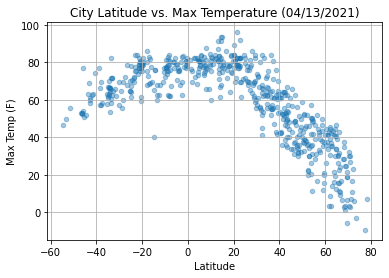

In [60]:
weather_df.plot(kind="scatter", x="Latitude", y="Max Temp", alpha=0.4)
plt.title("City Latitude vs. Max Temperature (04/13/2021)")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("../output_data/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

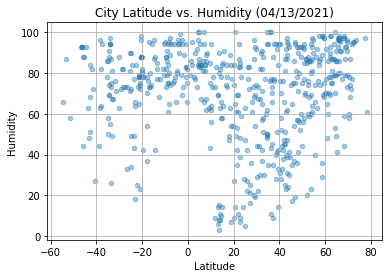

In [65]:
weather_df.plot(kind="scatter", x="Latitude", y="Humidity", alpha=0.4)
plt.title("City Latitude vs. Humidity (04/13/2021)")
plt.grid()
plt.savefig("../output_data/LatVsHD.png")
plt.show()

## Latitude vs. Cloudiness Plot

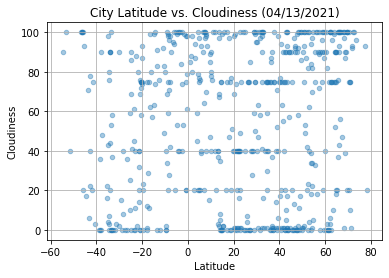

In [64]:
weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", alpha=0.4)
plt.title("City Latitude vs. Cloudiness (04/13/2021)")
plt.grid()
plt.savefig("../output_data/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

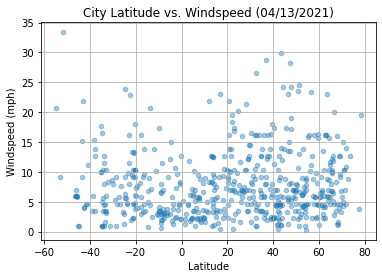

In [66]:
weather_df.plot(kind="scatter", x="Latitude", y="Windspeed (mph)", alpha=0.4)
plt.title("City Latitude vs. Windspeed (04/13/2021)")
plt.grid()
plt.savefig("../output_data/LatVsWind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
n_hemisphere_temp = weather_df.loc[weather_df['Latitude'] >= 0, ['Max Temp', 'Latitude']]
n_hemisphere_temp

,Max Temp,Latitude
0,40.32,47.4833
3,79.03,9.4942
5,66.20,32.3100
9,81.00,20.7000
10,5.95,72.7868
...,...,...
559,65.66,32.7670
561,39.99,50.0009
562,77.99,7.4167
563,78.12,22.8500


The r-value is: 0.7819741051849519


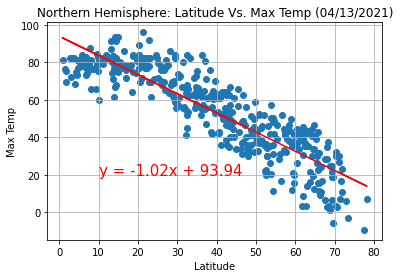

In [67]:
n_hemisphere_temp.plot(kind="scatter", x="Latitude", y="Max Temp", alpha=0.4)
x_values = n_hemisphere_temp['Latitude']
y_values = n_hemisphere_temp['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude Vs. Max Temp (04/13/2021)")
plt.grid()
plt.savefig("../output_data/NHemTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
s_hemisphere_temp = weather_df.loc[weather_df['Latitude'] < 0, ['Max Temp', 'Latitude']]
len(s_hemisphere_temp)

165

In [27]:
s_hemisphere_temp['Latitude'].max()

-0.1934

The r-value is: 0.3900401371590707


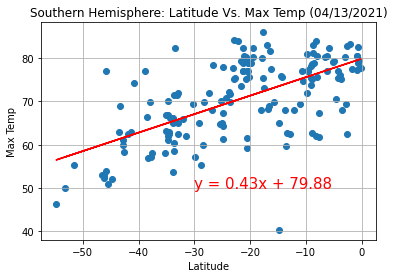

In [68]:
s_hemisphere_temp.plot(kind="scatter", x="Latitude", y="Max Temp", alpha=0.4)
x_values = s_hemisphere_temp['Latitude']
y_values = s_hemisphere_temp['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude Vs. Max Temp (04/13/2021)")
plt.grid()
plt.savefig("../output_data/SHemTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [31]:
n_hemisphere_hd = weather_df.loc[weather_df['Latitude'] >= 0, ['Humidity', 'Latitude']]
n_hemisphere_hd

,Humidity,Latitude
0,78,47.4833
3,75,9.4942
5,42,32.3100
9,65,20.7000
10,95,72.7868
...,...,...
559,51,32.7670
561,75,50.0009
562,84,7.4167
563,48,22.8500


The r-value is: 0.04561926483640086


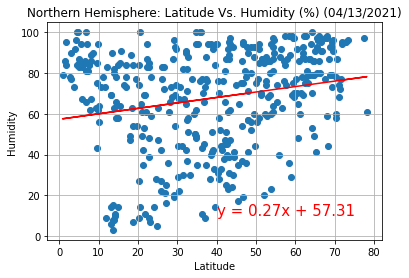

In [69]:
n_hemisphere_hd.plot(kind="scatter", x="Latitude", y="Humidity", alpha=0.4)
x_values = n_hemisphere_hd['Latitude']
y_values = n_hemisphere_hd['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude Vs. Humidity (%) (04/13/2021)")
plt.grid()
plt.savefig("../output_data/NHemHum.png")
plt.show()



#n_hemisphere_hd.plot(kind="scatter", x="Latitude", y="Humidity", alpha=0.4)
def linear_regress(x_values,y_values,title,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    r2 = rvalue**2
    print("The r-value is: " f'{r2}')
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.grid()
    plt.savefig("../output_data/NHemHum.png")
    plt.show()
x_values = n_hemisphere_hd['Latitude']
y_values = n_hemisphere_hd['Humidity']
linear_regress(x_values,y_values,"Latitude Vs. Humdity",(40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [35]:
s_hemisphere_hd = weather_df.loc[weather_df['Latitude'] < 0, ['Humidity', 'Latitude']]
s_hemisphere_hd

,Humidity,Latitude
1,87,-53.1500
2,51,-42.8794
4,66,-23.1203
6,75,-33.6971
7,93,-46.1927
...,...,...
538,79,-10.6517
543,94,-3.6954
545,82,-13.4584
552,43,-23.7000


The r-value is: 0.043323162749866834


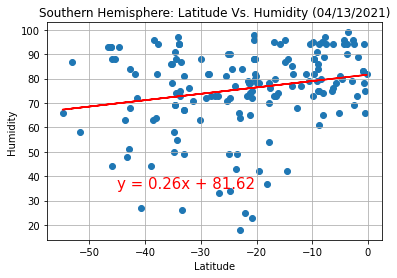

In [70]:
s_hemisphere_hd.plot(kind="scatter", x="Latitude", y="Humidity", alpha=0.4)
x_values = s_hemisphere_hd['Latitude']
y_values = s_hemisphere_hd['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude Vs. Humidity (04/13/2021)")
plt.grid()
plt.savefig("../output_data/SHemHum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [37]:
n_hemisphere_cloud = weather_df.loc[weather_df['Latitude'] >= 0, ['Cloudiness', 'Latitude']]
n_hemisphere_cloud

,Cloudiness,Latitude
0,99,47.4833
3,47,9.4942
5,90,32.3100
9,1,20.7000
10,100,72.7868
...,...,...
559,100,32.7670
561,0,50.0009
562,97,7.4167
563,0,22.8500


The r-value is: 0.011405297345402443


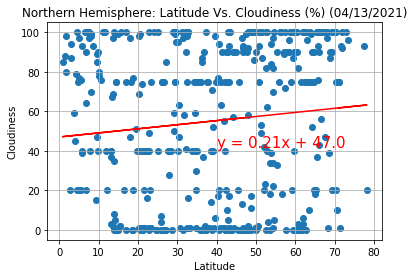

In [71]:
n_hemisphere_cloud.plot(kind="scatter", x="Latitude", y="Cloudiness", alpha=0.4)
x_values = n_hemisphere_cloud['Latitude']
y_values = n_hemisphere_cloud['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(40,42),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude Vs. Cloudiness (%) (04/13/2021)")
plt.grid()
plt.savefig("../output_data/NHemCloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [38]:
s_hemisphere_cloud = weather_df.loc[weather_df['Latitude'] < 0, ['Cloudiness', 'Latitude']]
s_hemisphere_cloud

,Cloudiness,Latitude
1,100,-53.1500
2,40,-42.8794
4,11,-23.1203
6,0,-33.6971
7,100,-46.1927
...,...,...
538,83,-10.6517
543,40,-3.6954
545,91,-13.4584
552,61,-23.7000


The r-value is: 0.039573032652318665


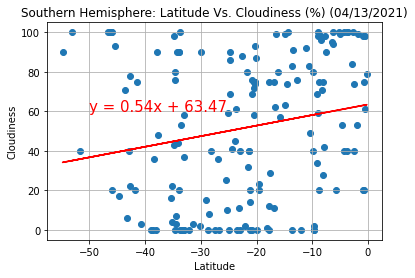

In [72]:
s_hemisphere_cloud.plot(kind="scatter", x="Latitude", y="Cloudiness", alpha=0.4)
x_values = s_hemisphere_cloud['Latitude']
y_values = s_hemisphere_cloud['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude Vs. Cloudiness (%) (04/13/2021)")
plt.grid()
plt.savefig("../output_data/SHemCloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [55]:
n_hemisphere_wind = weather_df.loc[weather_df['Latitude'] >= 0, ['Windspeed (mph)', 'Latitude']]
n_hemisphere_wind

,Windspeed (mph),Latitude
0,28.21,47.4833
3,8.16,9.4942
5,16.11,32.3100
9,13.80,20.7000
10,8.75,72.7868
...,...,...
559,11.18,32.7670
561,4.61,50.0009
562,5.35,7.4167
563,8.55,22.8500


The r-value is: 0.013616011213307785


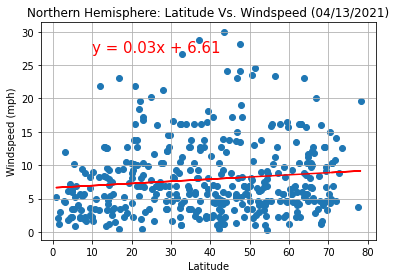

In [73]:
n_hemisphere_wind.plot(kind="scatter", x="Latitude", y="Windspeed (mph)", alpha=0.4)
x_values = n_hemisphere_wind['Latitude']
y_values = n_hemisphere_wind['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(10,27),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude Vs. Windspeed (04/13/2021)")
plt.grid()
plt.savefig("../output_data/NHemWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [56]:
s_hemisphere_wind = weather_df.loc[weather_df['Latitude'] < 0, ['Windspeed (mph)', 'Latitude']]
s_hemisphere_wind

,Windspeed (mph),Latitude
1,9.22,-53.1500
2,21.85,-42.8794
4,7.92,-23.1203
6,4.47,-33.6971
7,5.99,-46.1927
...,...,...
538,2.95,-10.6517
543,4.61,-3.6954
545,7.11,-13.4584
552,4.61,-23.7000


The r-value is: 0.04235204211866371


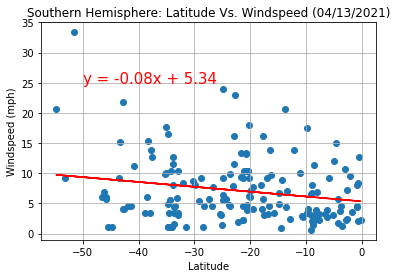

In [74]:
s_hemisphere_wind.plot(kind="scatter", x="Latitude", y="Windspeed (mph)", alpha=0.4)
x_values = s_hemisphere_wind['Latitude']
y_values = s_hemisphere_wind['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r2 = rvalue**2
print("The r-value is: " f'{r2}')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude Vs. Windspeed (04/13/2021)")
plt.grid()
plt.savefig("../output_data/SHemWind.png")
plt.show()